In [1]:
import requests
address="kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x"
API_KEY="kdp_722ad9825ff1144878629812d69609b0e3084323ec6d4299ffd4cbd4b23a0f2b"
url = f"https://api.kas.fyi/v1/addresses/{address}/transactions"
headers = {"x-api-key": API_KEY}

response = requests.get(url, headers=headers)
response.raise_for_status()

data = response.json()
print(data)

{'transactions': [{'transactionId': 'ed04021ef8b7ed16bf8a8c6d6afa406896e295253db55759e3eb2c2c521ee2da', 'blockTime': '1763989437208', 'subnetworkId': '0000000000000000000000000000000000000000', 'hash': '7dac54c803988c678f7628e53fcc1888c148d953809c86061ce7f0a2da7e2cd6', 'mass': '1624', 'isAccepted': True, 'acceptingBlockHash': 'b664647759ee3a3e94629226d0de17bd40f49a8f10d8aa4d667b622ffc874e64', 'confirmations': 1790871, 'outputs': [{'transactionId': 'ed04021ef8b7ed16bf8a8c6d6afa406896e295253db55759e3eb2c2c521ee2da', 'index': 0, 'amount': '17999950000', 'scriptPublicKey': '0000204012759604c3a7834bac13858aa40c66fc2cba88b5419acda2571532d9bcdb17ac', 'scriptPublicKeyAddress': 'kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2', 'scriptPublicKeyType': 'PubKey'}], 'blockHashes': ['08ba4f101460b282a7bcc28ad9ac945d5a97f6af1b633a719c0c7203ef2e11d3', '1217ebf9ea2c8b82391b5d7ee431365288d38cbc26e6bd3686a0442c83c97b42', '7087b02fc3d926a028207c08b378620752a3b7b905d7cfb14537d0bf89312a7

In [2]:
print(data["transactions"][0]["inputs"][0]["previousOutput"]["amount"][:4])

1800


In [3]:
contacts={}
transacs_key=[]
dig_amount=4
nb_transacs=100

for transactions in data["transactions"][:nb_transacs]:
    oukey,outs,ins=[],[],[]
    
    outputs=transactions["outputs"]
    for output in outputs:
        key_out=output["scriptPublicKeyAddress"]
        outs.append(key_out)

    inputs=transactions["inputs"]
    for input in inputs:
        key_in=input["previousOutput"]["scriptPublicKeyAddress"]
        amount=int(input["previousOutput"]["amount"][:dig_amount])
        ins.append([key_in,float(amount/1000)])
    transacs_key.append([ins,outs])
    
for i in range(len(data["transactions"][:nb_transacs])):
    print(f"Transaction : {i}\nInputs: {transacs_key[i][0]}\nOutputs: {transacs_key[i][1]}")

Transaction : 0
Inputs: [['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 1.8]]
Outputs: ['kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2']
Transaction : 1
Inputs: [['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 8.999], ['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.02]]
Outputs: ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']
Transaction : 2
Inputs: [['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 8.0]]
Outputs: ['kaspa:qpqpyavkqnp60q6t4sfctz4yp3n0ct963z65rxkd5ft32vkehnd3wx8jqctr2']
Transaction : 3
Inputs: [['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.7]]
Outputs: ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']
Transaction : 4
Inputs: [['kaspa:qqssy8x2

In [4]:
print(transacs_key[1])

[[['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 8.999], ['kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl', 1.02]], ['kaspa:qqssy8x2stwk6x7trmw56m8rwfkwul70rpqxrvv789mxqz73pdny2sprry82x', 'kaspa:qzaglyv3qfr2t7jrprfvs432fheqwjz08m7jmn8808ln8czdgqsqw9mn6x5tl']]


kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  1.8
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  8.999
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  8.999
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.02
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.02
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  8.0
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.7
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.7
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  1.2
kaspa:qzaglyv3qfr2t7 and kaspa:qqssy8x2stwk6x amount:  1.45
kaspa:qzaglyv3qfr2t7 and kaspa:qzaglyv3qfr2t7 amount:  1.45
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  5.0
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  4.95
kaspa:qyph30xd6t4xnp and kaspa:qqssy8x2stwk6x amount:  6.5
kaspa:qyph30xd6t4xnp and kaspa:qyph30xd6t4xnp amount:  6.5
kaspa:qqssy8x2stwk6x and kaspa:qpqpyavkqnp60q amount:  5.0
kaspa:qyph30xd6t4xnp and kaspa:qqssy8x2stwk6x a

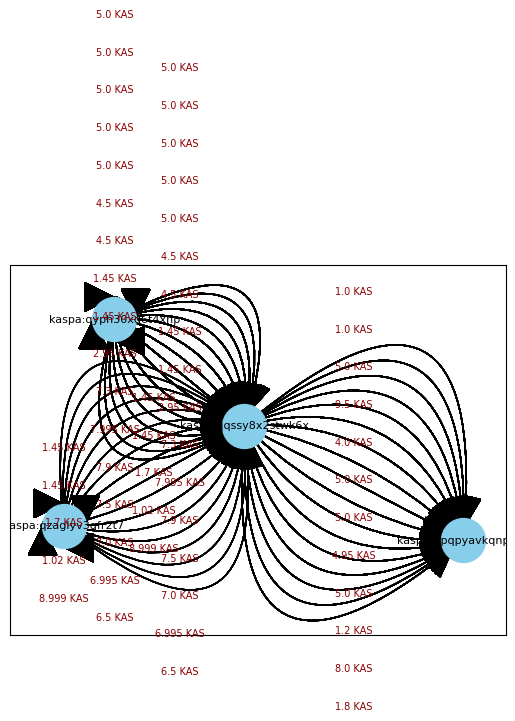

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

name_size=20

allKey=[]
G = nx.MultiDiGraph()
for transac in transacs_key:
    for in_key,amount in transac[0]:
        allKey.append(in_key[:name_size])
    for out_key in transac[1]:
        allKey.append(out_key[:name_size])
    allKey=list(set(allKey))
    G.add_nodes_from(allKey)
    
    
    for in_key,amount in transac[0]:
        for out_key in transac[1]:
            print(in_key[:name_size],"and",out_key[:name_size],"amount: ",amount)
            G.add_edge(in_key[:name_size],out_key[:name_size],amount=amount)
        
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=8)
for i, (u, v, k, data) in enumerate(G.edges(keys=True, data=True)):
    rad = 0.15 * (k - len(G[u][v]) // 2)
    nx.draw_networkx_edges(
    G, pos,
    connectionstyle=f'arc3,rad={rad}', 
    arrows=True,                       
    arrowstyle='-|>',                  
    arrowsize=50,                      
    edge_color='black'
    )
    x_mid = (pos[u][0] + pos[v][0]) / 2
    y_mid = (pos[u][1] + pos[v][1]) / 2
    plt.text(x_mid, y_mid + rad, f"{data['amount']} KAS", fontsize=7, color="darkred", ha="center")

plt.show()